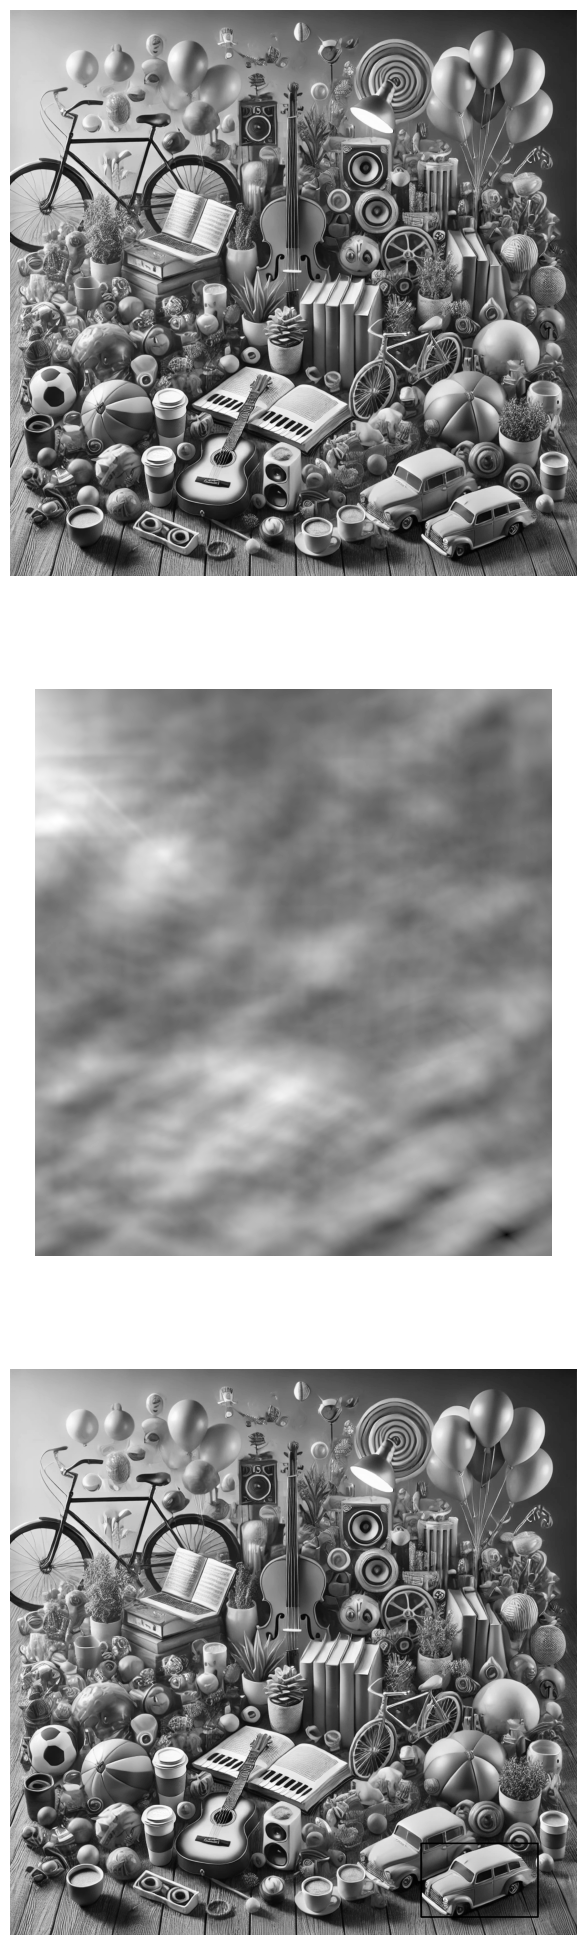

In [1]:
# https://youtu.be/cDP_4VbC_sE
"""
Locating objects in large images using template matching

Need a source image and a template image.
The template image T is slided over the source image (as in 2D convolution), 
and the program tries to find matches using statistics.
Several comparison methods are implemented in OpenCV.
It returns a grayscale image, where each pixel denotes how much does the 
neighbourhood of that pixel match with template.

Once you get the result, you can use cv2.minMaxLoc() function 
to find where is the maximum/minimum value. 
Take it as the top-left corner of the rectangle and take (w,h) as 
width and height of the rectangle. 
That rectangle can be drawn on the region of matched template.

If the template image is larger than its size in the large image, we can perfrom
the same exercise by resizing the template image to multiple sizes. 
We can then extract the match with best score. 
"""
### Template matching, single object in an image.


import cv2
import numpy as np
from matplotlib import pyplot as plt

img_rgb = cv2.imread('main.png',0)  #Large image
plt.figure(figsize=(20,25))
plt.subplot(3,1,1)
plt.imshow(img_rgb,cmap='gray')
plt.axis('off')

template = cv2.imread('template.png', 0)  #Small image (template)
h, w = template.shape[::] 

#methods available: ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
#            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

res = cv2.matchTemplate(img_rgb, template, cv2.TM_SQDIFF)
# For TM_SQDIFF, Good match yields minimum value; bad match yields large values
# For all others it is exactly opposite, max value = good fit.
plt.subplot(3,1,2)
plt.imshow(res,cmap='gray')
plt.axis('off')

min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

top_left = min_loc  #Change to max_loc for all except for TM_SQDIFF
bottom_right = (top_left[0] + w, top_left[1] + h)

cv2.rectangle(img_rgb, top_left, bottom_right, (0, 0, 0), 2)  #Red rectangle with thickness 2. 
plt.subplot(3,1,3)
cv2.imwrite('matched.jpg', img_rgb)
plt.imshow(img_rgb,cmap='gray')
plt.axis('off')
plt.show()
